In [1]:
import requests

In [2]:
api_key = ""
api_secret = ""
url = f'https://api.flickr.com/services/rest/'
data_file = 'more_data.csv'

In [3]:
import csv
import requests

def fetch_and_save_data(tag, total_photos):
    url = 'https://api.flickr.com/services/rest/'
    per_page = 100  # Number of results per page
    photos_collected = 0
    page = 1

    # Open CSV file for writing
    with open(data_file, mode='a', newline='') as csv_file:
        fieldnames = ['Photo URL', 'Date Taken', 'Latitude', 'Longitude', 'tag']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

        # Write header row only if the file is empty
        if csv_file.tell() == 0:
            writer.writeheader()

        while photos_collected < total_photos:
            print(f"Photos collected vs total photos: {photos_collected} : {total_photos}")
            params = {
                'method': 'flickr.photos.search',
                'api_key': api_key,
                'tags': tag,
                'extras': 'url_o,date_taken,geo', 
                'format': 'json',
                'nojsoncallback': 1,
                'per_page': per_page,
                'page': page,
                "has_geo": "true",
                #"geo_context": "2"
            }

            response = requests.get(url, params=params)
            data = response.json()

            # Check if the request was successful
            if data['stat'] == 'ok':
                photos = data['photos']['photo']
                num_photos = min(total_photos - photos_collected, len(photos))
                for i in range(num_photos):
                    photo = photos[i]
                    # Get photo data
                    if 'url_o' in photo:
                        photo_url = photo['url_o']
                        photo_date = photo['datetaken']
                        photo_lat = photo['latitude'] if 'latitude' in photo else ''
                        photo_lon = photo['longitude'] if 'longitude' in photo else ''
                        # Write photo data to CSV
                        writer.writerow({'Photo URL': photo_url, 'Date Taken': photo_date, 'Latitude': photo_lat, 'Longitude': photo_lon, 'tag': tag})
                        photos_collected += 1

                    if photos_collected == total_photos:
                        break  # Exit the loop if the desired number of photos has been collected

                page += 1
            else:
                print("Error:", data['message'])
                break

In [4]:
#for x in [ "spring fashion", "summer fashion"]:
#    fetch_and_save_data(x, total_photos=190)

Photos collected vs total photos: 0 : 190
Photos collected vs total photos: 51 : 190
Photos collected vs total photos: 151 : 190
Photos collected vs total photos: 189 : 190
Photos collected vs total photos: 189 : 190
Photos collected vs total photos: 189 : 190
Photos collected vs total photos: 189 : 190
Photos collected vs total photos: 189 : 190
Photos collected vs total photos: 189 : 190
Photos collected vs total photos: 189 : 190
Photos collected vs total photos: 189 : 190
Photos collected vs total photos: 189 : 190
Photos collected vs total photos: 189 : 190
Photos collected vs total photos: 189 : 190
Photos collected vs total photos: 189 : 190
Photos collected vs total photos: 189 : 190
Photos collected vs total photos: 189 : 190
Photos collected vs total photos: 189 : 190
Photos collected vs total photos: 189 : 190
Photos collected vs total photos: 189 : 190
Photos collected vs total photos: 189 : 190
Photos collected vs total photos: 189 : 190
Photos collected vs total photos: 1

KeyboardInterrupt: 

In [5]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
import numpy as np

In [ ]:
body_cascade = cv2.CascadeClassifier("haarcascade_fullbody.xml")

In [ ]:
df = pd.read_csv("flickr_data.csv")

In [ ]:
df.iloc[0]

Photo URL     https://live.staticflickr.com/65535/5355604611...
Date Taken                                  2024-02-27 13:14:24
Latitude                                                    0.0
Longitude                                                   0.0
tag                                            stockholm+street
Name: 0, dtype: object

In [ ]:
img_path = df.iloc[10]["Photo URL"]

In [ ]:
def fetch_photo(img_path):
    with urllib.request.urlopen(img_path) as response:
        img_array = np.array(bytearray(response.read()), dtype=np.uint8)

    # Decode the image
    image = cv2.imdecode(img_array, -1)
    return image

In [ ]:
def detect_human_haarcascade(img):
    
  
    human_img = img.copy()
  
    human_rects = body_cascade.detectMultiScale(human_img) 
    
    for (x,y,w,h) in human_rects: 
        cv2.rectangle(human_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return human_img

In [ ]:
for x in range(10,30):
    img_path = df.iloc[x]["Photo URL"]
    result = detect_human_haarcascade(fetch_photo(img_path))
    plt.imshow(result)
    plt.show()

In [ ]:
def detect_human_hog(img):
    hog = cv2.HOGDescriptor()
    hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
    
    boxes, weights = hog.detectMultiScale(img, winStride=(8,8) )

    boxes = np.array([[x, y, x + w, y + h] for (x, y, w, h) in boxes])

    for (xA, yA, xB, yB) in boxes:
        # display the detected boxes in the colour picture
        cv2.rectangle(img, (xA, yA), (xB, yB),
                          (0, 255, 0), 2)
    return img

In [ ]:
for x in range(10,30):
    img_path = df.iloc[x]["Photo URL"]
    result = detect_human_hog(fetch_photo(img_path))
    plt.imshow(result)
    plt.show()

In [ ]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

In [ ]:
labels_file = "coco.names"
weights = "yolov4.weights"
config = "yolov4.cfg"

In [ ]:
model = cv2.dnn.readNetFromDarknet(config,weights)
model

< cv2.dnn.Net 0000020BB7520C30>

In [ ]:
img_path = df.iloc[11]["Photo URL"]

In [ ]:
img_path

'https://live.staticflickr.com/65535/53007885414_b2ac5ba478_o.jpg'

In [ ]:
with urllib.request.urlopen(img_path) as response:
    img_array = np.array(bytearray(response.read()), dtype=np.uint8)

# Decode the image
image = cv2.imdecode(img_array, -1)

In [ ]:
display(image)

In [ ]:
blob = cv2.dnn.blobFromImage(image, # Original image
                         1/255.0, # Scaling factor scalefactor
                         (608,608), # output size , size
                         swapRB = True, # because our image is BGR ==> RGB
                         crop = False) # to keep the same image with out clipping the original on 

In [ ]:
model.setInput(blob)

In [ ]:
ln = model.getLayerNames()
ln = [ln[i-1] for i in model.getUnconnectedOutLayers()]

In [ ]:
layer_output = model.forward(ln) # run prediction and get the output of output layers in ln into my variable layer_output


In [ ]:
height , width , colors = image.shape
boxes = []
confidence_scores = []
classIDs = []

In [ ]:
for output in layer_output:
    #print(output)
    for detected in output:
        # print(detected)
        scores = detected[5:]
        classID = np.argmax(scores)
        confidence = scores[classID] # I found the confidence
        if confidence > 0.1 : 
            box = detected[0:4] * np.array([width,height,width,height])
            (center_x , center_y , box_width,box_height) = box.astype("int")
            # get (x,y) for top_left corner
            x = int((center_x - box_width/2))
            y = int((center_y - box_height/2))
            boxes.append([x , y , int(box_width) , int(box_height)])
            confidence_scores.append(float(confidence))
            classIDs.append(classID)
            print(classID)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
26
26
26
26
26
26


In [ ]:
classes = open(labels_file).read().strip().split("\n")
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [ ]:
for id in classIDs:
    print(classes[id])

person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
bicycle
bicycle
bicycle
bicycle
bicycle
bicycle
handbag
handbag
handbag
handbag
handbag
handbag


In [ ]:
score_threshold = 0.9
non_max_suppression_threshold = 0.9

found_boxes = cv2.dnn.NMSBoxes(boxes,
                               confidence_scores,
                               score_threshold,
                               non_max_suppression_threshold)

In [ ]:
color = (255,255,0)
thickness = 2
font_scale = 1 
if len(found_boxes) > 0 : 
    for index in found_boxes.flatten():
        (x,y) = (boxes[index][0],boxes[index][1])
        (width,height) = (boxes[index][2],boxes[index][3])
        cv2.rectangle(image,(x,y),(x+width,y+height),color,thickness)
        label = classes[classIDs[index]]
        print(label)
        cv2.putText(image,label,(x,y),cv2.FONT_HERSHEY_SIMPLEX,font_scale,color,2)
        confidence = "{:.2f}".format(confidence_scores[index])
        cv2.putText(image,confidence,(x+100,y), cv2.FONT_HERSHEY_SIMPLEX,font_scale,color,2)

person
person
person


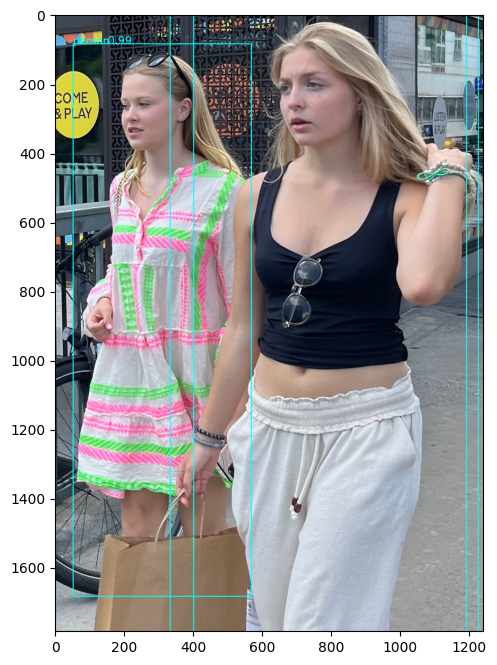

In [ ]:
output_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
display(output_image)

https://mmlab.ie.cuhk.edu.hk/projects/DeepFashion.html


https://valohai.com/blog/clothes-detection-for-fashion-recommendation/

In [ ]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry


# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 52.52,
	"longitude": 13.41,
	"start_date": "2024-03-26",
	"end_date": "2024-04-09",
	"hourly": ["temperature_2m", "relative_humidity_2m", "dew_point_2m", "apparent_temperature", "precipitation", "rain", "snowfall", "snow_depth", "weather_code", "surface_pressure", "cloud_cover", "cloud_cover_low", "cloud_cover_mid", "cloud_cover_high", "et0_fao_evapotranspiration", "vapour_pressure_deficit", "wind_speed_10m", "wind_speed_100m", "wind_direction_10m", "wind_direction_100m", "wind_gusts_10m", "is_day", "sunshine_duration", "shortwave_radiation", "direct_radiation"]
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_relative_humidity_2m = hourly.Variables(1).ValuesAsNumpy()
hourly_dew_point_2m = hourly.Variables(2).ValuesAsNumpy()
hourly_apparent_temperature = hourly.Variables(3).ValuesAsNumpy()
hourly_precipitation = hourly.Variables(4).ValuesAsNumpy()
hourly_rain = hourly.Variables(5).ValuesAsNumpy()
hourly_snowfall = hourly.Variables(6).ValuesAsNumpy()
hourly_snow_depth = hourly.Variables(7).ValuesAsNumpy()
hourly_weather_code = hourly.Variables(8).ValuesAsNumpy()
hourly_surface_pressure = hourly.Variables(9).ValuesAsNumpy()
hourly_cloud_cover = hourly.Variables(10).ValuesAsNumpy()
hourly_cloud_cover_low = hourly.Variables(11).ValuesAsNumpy()
hourly_cloud_cover_mid = hourly.Variables(12).ValuesAsNumpy()
hourly_cloud_cover_high = hourly.Variables(13).ValuesAsNumpy()
hourly_et0_fao_evapotranspiration = hourly.Variables(14).ValuesAsNumpy()
hourly_vapour_pressure_deficit = hourly.Variables(15).ValuesAsNumpy()
hourly_wind_speed_10m = hourly.Variables(16).ValuesAsNumpy()
hourly_wind_speed_100m = hourly.Variables(17).ValuesAsNumpy()
hourly_wind_direction_10m = hourly.Variables(18).ValuesAsNumpy()
hourly_wind_direction_100m = hourly.Variables(19).ValuesAsNumpy()
hourly_wind_gusts_10m = hourly.Variables(20).ValuesAsNumpy()
hourly_is_day = hourly.Variables(21).ValuesAsNumpy()
hourly_sunshine_duration = hourly.Variables(22).ValuesAsNumpy()
hourly_shortwave_radiation = hourly.Variables(23).ValuesAsNumpy()
hourly_direct_radiation = hourly.Variables(24).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["relative_humidity_2m"] = hourly_relative_humidity_2m
hourly_data["dew_point_2m"] = hourly_dew_point_2m
hourly_data["apparent_temperature"] = hourly_apparent_temperature
hourly_data["precipitation"] = hourly_precipitation
hourly_data["rain"] = hourly_rain
hourly_data["snowfall"] = hourly_snowfall
hourly_data["snow_depth"] = hourly_snow_depth
hourly_data["weather_code"] = hourly_weather_code
hourly_data["surface_pressure"] = hourly_surface_pressure
hourly_data["cloud_cover"] = hourly_cloud_cover
hourly_data["cloud_cover_low"] = hourly_cloud_cover_low
hourly_data["cloud_cover_mid"] = hourly_cloud_cover_mid
hourly_data["cloud_cover_high"] = hourly_cloud_cover_high
hourly_data["et0_fao_evapotranspiration"] = hourly_et0_fao_evapotranspiration
hourly_data["vapour_pressure_deficit"] = hourly_vapour_pressure_deficit
hourly_data["wind_speed_10m"] = hourly_wind_speed_10m
hourly_data["wind_speed_100m"] = hourly_wind_speed_100m
hourly_data["wind_direction_10m"] = hourly_wind_direction_10m
hourly_data["wind_direction_100m"] = hourly_wind_direction_100m
hourly_data["wind_gusts_10m"] = hourly_wind_gusts_10m
hourly_data["is_day"] = hourly_is_day
hourly_data["sunshine_duration"] = hourly_sunshine_duration
hourly_data["shortwave_radiation"] = hourly_shortwave_radiation
hourly_data["direct_radiation"] = hourly_direct_radiation

hourly_dataframe = pd.DataFrame(data = hourly_data)
print(hourly_dataframe)



Coordinates 52.5483283996582°N 13.407821655273438°E
Elevation 38.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
                         date  temperature_2m  relative_humidity_2m  \
0   2024-03-26 00:00:00+00:00        0.358500             93.336464   
1   2024-03-26 01:00:00+00:00        0.958500             92.357460   
2   2024-03-26 02:00:00+00:00        0.858500             92.351418   
3   2024-03-26 03:00:00+00:00        0.858500             92.687492   
4   2024-03-26 04:00:00+00:00        0.908500             92.690376   
..                        ...             ...                   ...   
355 2024-04-09 19:00:00+00:00       13.308500             66.543190   
356 2024-04-09 20:00:00+00:00       13.008500             65.123817   
357 2024-04-09 21:00:00+00:00       12.408501             71.794464   
358 2024-04-09 22:00:00+00:00       11.958500             75.736420   
359 2024-04-09 23:00:00+00:00       11.858500             76.757721   

     dew_point_2m  app

In [21]:
import tensorflow as tf

# Path to the directory containing the .pb file
model_path = 'model_EfficientNetB1_11_04_2024_09_36/model_saved'

# Load the model
#load_options = tf.saved_model.LoadOptions(experimental_io_device='/cpu:0')
model = tf.saved_model.load(model_path, options = load_options)

In [18]:
model

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x7fd1d954de50>

In [50]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
#from tflite_model_maker.config import ExportFormat
# Anta att detta är din klassnamn-mappning
class_names = {0: 'dress', 1: 'jacket', 2: 'long-pants', 3: 'long-sleeve', 4: 'short-sleeve', 5: 'shorts', 6: 'skirt'}

def predict_clothing(img_path):
    # Ladda och förbered din bild (du har redan denna kod)
    img = image.load_img(img_path, target_size=(300, 300))
    img_array = image.img_to_array(img)
    img_array = preprocess_input(img_array)
    img_tensor = tf.expand_dims(img_array, 0)

    # Ladda modellen och gör en prediktion
    #model_path = "src/all_models/model_EfficientNetB0_25_03_2024_09_36/model_saved/"
    #model = tf.saved_model.load(model_path)
    infer = model.signatures['serving_default']
    predictions = infer(tf.constant(img_tensor))

    # Använd din 'dense' key för att få predictions
    predicted_scores = predictions['dense']
    #model.export(export_dir='.', export_format=ExportFormat.LABEL)
    # Anta att predicted_scores är logits och använd softmax för att få sannolikheter
    predicted_probabilities = tf.nn.softmax(predicted_scores).numpy()
    top_indices = np.argsort(predicted_probabilities)[0][-3:][::-1]

    top_predictions = {}
    for index in top_indices:
        top_predictions[class_names[index]] = predicted_probabilities[0][index]

    return top_predictions


    # Hitta indexet för den högsta sannolikheten
    #predicted_class_index = np.argmax(predicted_probabilities, axis=-1)
    #predicted_class_names = class_names[predicted_class_index[0]]  # Anta att vi hanterar en enstaka bild
    #predicted_confidence = predicted_probabilities[0][predicted_class_index[0]]
    #print(f"CONFIDENCE LEVEL FOR:'{predicted_class_name}':ACCURACY: {predicted_confidence * 100:.2f}%")

In [58]:
import os
import glob
import random

# Define the root directory
root_dir = "output_folder\Human"

# Loop through all subfolders
for subdir in os.listdir(root_dir):
    subdir_path = os.path.join(root_dir, subdir)
    if os.path.isdir(subdir_path):
        print("Folder:", subdir)  # Print the name of the folder
        # Get file paths in the subfolder
        file_paths = glob.glob(os.path.join(subdir_path, "*"))
        
        # Pass each random file path to the predict_clothing function
        for file_path in file_paths:
            top_predictions = predict_clothing(file_path)
            print(top_predictions)


Folder: Human
{'shorts': 0.2923181, 'dress': 0.21170434, 'long-pants': 0.16737396}
{'dress': 0.2752361, 'shorts': 0.2257053, 'skirt': 0.13948818}
{'dress': 0.2558698, 'shorts': 0.23615777, 'long-pants': 0.14574222}
{'shorts': 0.31655684, 'dress': 0.18784852, 'long-pants': 0.17279512}
{'dress': 0.26807514, 'shorts': 0.22488895, 'skirt': 0.14558989}
{'dress': 0.27900407, 'shorts': 0.2274962, 'skirt': 0.13436759}
